# Предварительная обработка данных.

### Задания для выполнения
1) Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.

2) Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

3) Поработайте с типами переменных. Все числовые значения переведите в формат int.

4) Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

5) Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

6) Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

7) Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

8) Сохраните полученный датасет и выведете его.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

In [2]:
pd.options.mode.chained_assignment = None

#### Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.

In [3]:
cars_df = pd.read_csv('cars_sampled.csv')
cars_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [5]:
cars_df['dateCrawled'] =  pd.to_datetime(cars_df['dateCrawled'], format="%d/%m/%Y %H:%M")
cars_df['dateCreated'] =  pd.to_datetime(cars_df['dateCreated'], format="%d/%m/%Y %H:%M")
cars_df['lastSeen'] =  pd.to_datetime(cars_df['lastSeen'], format="%d/%m/%Y %H:%M")

In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

#### Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [7]:
cars_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


Выведем количество пустых значений для каждого столбца фрейма

In [8]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [9]:
missing_values_table(cars_df)

,Missing Values,% of Total Values
notRepairedDamage,9716,19.4
vehicleType,5188,10.4
fuelType,4503,9.0
gearbox,2824,5.6
model,2758,5.5


Выведем уникальные элементы фрейма и их количество

In [10]:
cars_df.nunique()

dateCrawled            12039
name                   38766
seller                     2
offerType                  2
price                   2393
abtest                     2
vehicleType                8
yearOfRegistration        97
gearbox                    2
powerPS                  460
model                    248
kilometer                 13
monthOfRegistration       13
fuelType                   7
brand                     40
notRepairedDamage          2
dateCreated               75
postalCode              7018
lastSeen               10413
dtype: int64

In [11]:
cars_df.apply(lambda col: col.unique())

dateCrawled            [2016-03-30T13:51:00.000000000, 2016-03-07T09:...
name                   [Zu_verkaufen, Volvo_XC90_2.4D_Summum, Volkswa...
seller                                             [private, commercial]
offerType                                               [offer, request]
price                  [4450, 13299, 3200, 4500, 18750, 988, 400, 139...
abtest                                                   [test, control]
vehicleType            [limousine, suv, bus, small car, station wagon...
yearOfRegistration     [2003, 2005, 2006, 2008, 1995, 1996, 1997, 200...
gearbox                                         [manual, automatic, nan]
powerPS                [150, 163, 101, 86, 185, 90, 0, 136, 122, 140,...
model                  [3er, xc_reihe, touran, ibiza, passat, astra, ...
kilometer              [150000, 60000, 125000, 5000, 50000, 80000, 90...
monthOfRegistration           [3, 6, 11, 12, 2, 5, 4, 1, 9, 0, 10, 8, 7]
fuelType               [diesel, petrol, nan, cng, l

#### Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

C:\Users\sanha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

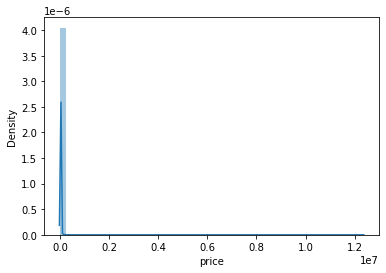

In [12]:
sns.distplot(cars_df.price)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

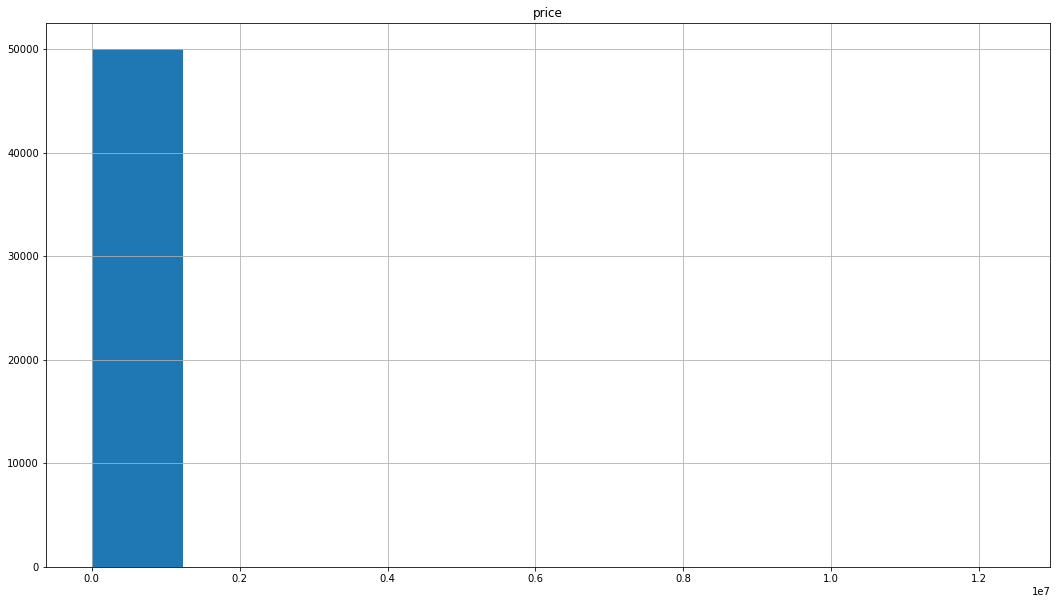

In [13]:
cars_df.hist(figsize=(18,10),column=['price'])

<AxesSubplot:>

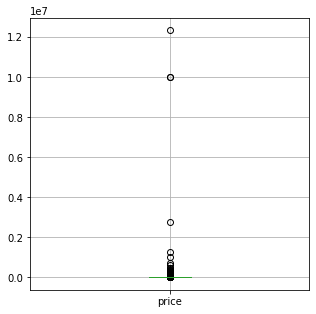

In [14]:
cars_df.boxplot(figsize=(5,5),column=['price'])

In [15]:
cars_df = cars_df[(cars_df['price'] > 650) & (cars_df['price'] < 14000)]
cars_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-04-07 04:44:00
1,2016-03-07 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-03-07,88045,2016-03-26 13:17:00
2,2016-04-01 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-04-01 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-04-07 04:44:00
5,2016-04-02 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2016-04-02,26826,2016-04-02 12:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,2016-03-10 23:36:00,BMW_X3_3.0i,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no,2016-03-10,96152,2016-04-06 02:17:00
49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,2016-03-14,99310,2016-03-31 00:45:00
49993,2016-03-14 11:37:00,Renault_Clio_mit_Servolenkung_und_neuem_TÜV!,private,offer,830,test,small car,1999,manual,60,clio,125000,8,petrol,renault,no,2016-03-14,33659,2016-03-22 04:47:00
49995,2016-03-23 21:45:00,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no,2016-03-23,27305,2016-04-04 01:47:00


<AxesSubplot:>

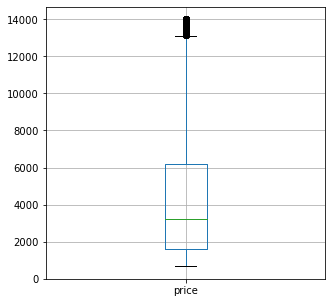

In [16]:
cars_df.boxplot(figsize=(5,5),column=['price'])

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

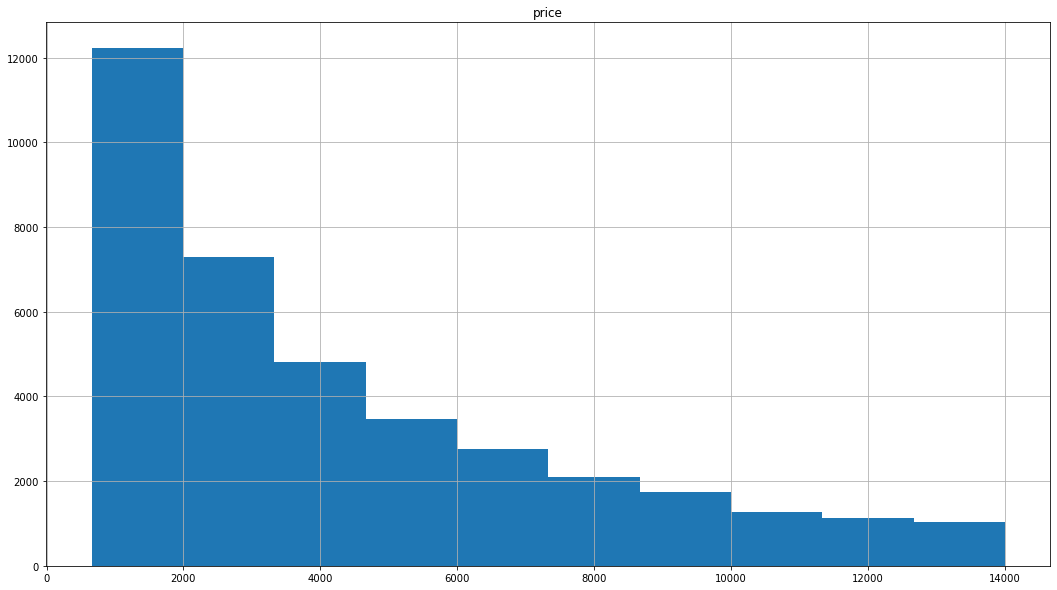

In [17]:
cars_df.hist(figsize=(18,10),column=['price'])

#### Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

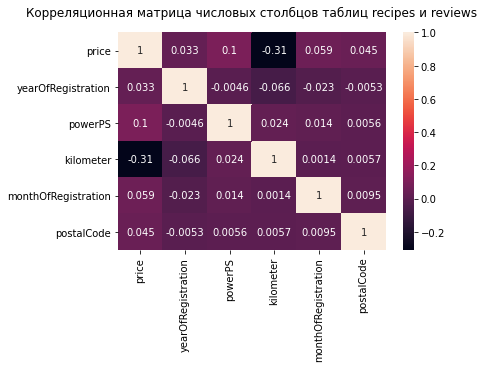

In [18]:
heat_map = sns.heatmap(cars_df.corr(), annot = True)
plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews", pad=16)
plt.show()

##### Единственными показателями у которых относительно высокая корреляция в данном случае являются kilometer и powerPS, именно поэтому приступим к их "очистке от аномалий"

<AxesSubplot:>

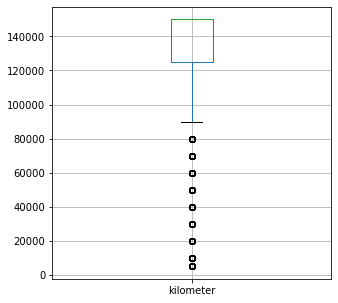

In [19]:
cars_df.boxplot(figsize=(5,5),column=['kilometer'])

<AxesSubplot:>

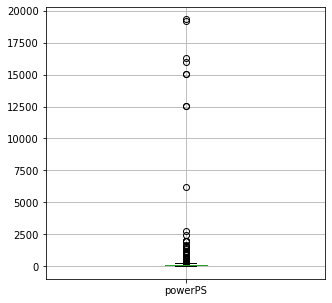

In [20]:
cars_df.boxplot(figsize=(5,5),column=['powerPS'])

In [21]:
cars_df = cars_df[(cars_df['powerPS'] > 60) & (cars_df['powerPS'] < 400)]
cars_df = cars_df[cars_df['kilometer'] > 40000]
cars_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-04-07 04:44:00
1,2016-03-07 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-03-07,88045,2016-03-26 13:17:00
2,2016-04-01 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-04-01 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-04-07 04:44:00
5,2016-04-02 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2016-04-02,26826,2016-04-02 12:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,2016-03-30 17:54:00,Opel_Omega_B_TÜV_02/2017,private,offer,990,control,limousine,1999,manual,136,omega,150000,2,petrol,opel,no,2016-03-30,17214,2016-04-03 08:16:00
49990,2016-03-25 22:47:00,Chervrolet_Orlando_Bilder_Folgen!!!!,private,offer,13500,control,station wagon,2012,automatic,163,others,80000,3,NaN,chevrolet,no,2016-03-25,12555,2016-04-07 06:17:00
49991,2016-03-10 23:36:00,BMW_X3_3.0i,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no,2016-03-10,96152,2016-04-06 02:17:00
49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,2016-03-14,99310,2016-03-31 00:45:00


<AxesSubplot:>

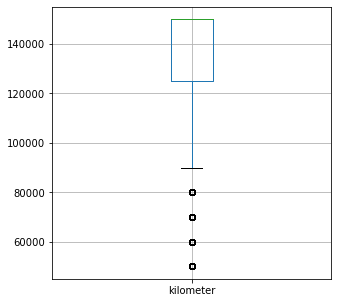

In [22]:
cars_df.boxplot(figsize=(5,5),column=['kilometer'])

<AxesSubplot:>

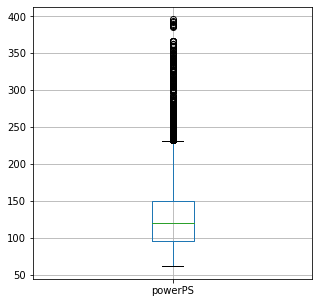

In [23]:
cars_df.boxplot(figsize=(5,5),column=['powerPS'])

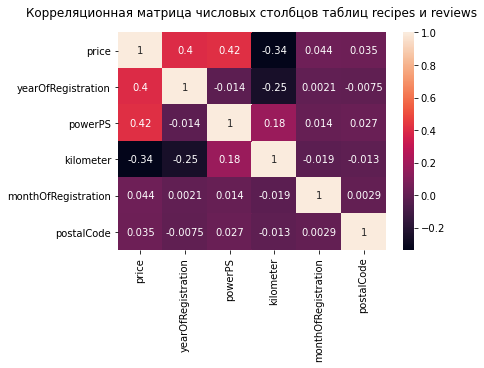

In [24]:
heat_map = sns.heatmap(cars_df.corr(), annot = True)
plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews", pad=16)
plt.show()

array([[<AxesSubplot:title={'center':'kilometer'}>,
        <AxesSubplot:title={'center':'yearOfRegistration'}>],
       [<AxesSubplot:title={'center':'powerPS'}>, <AxesSubplot:>]],
      dtype=object)

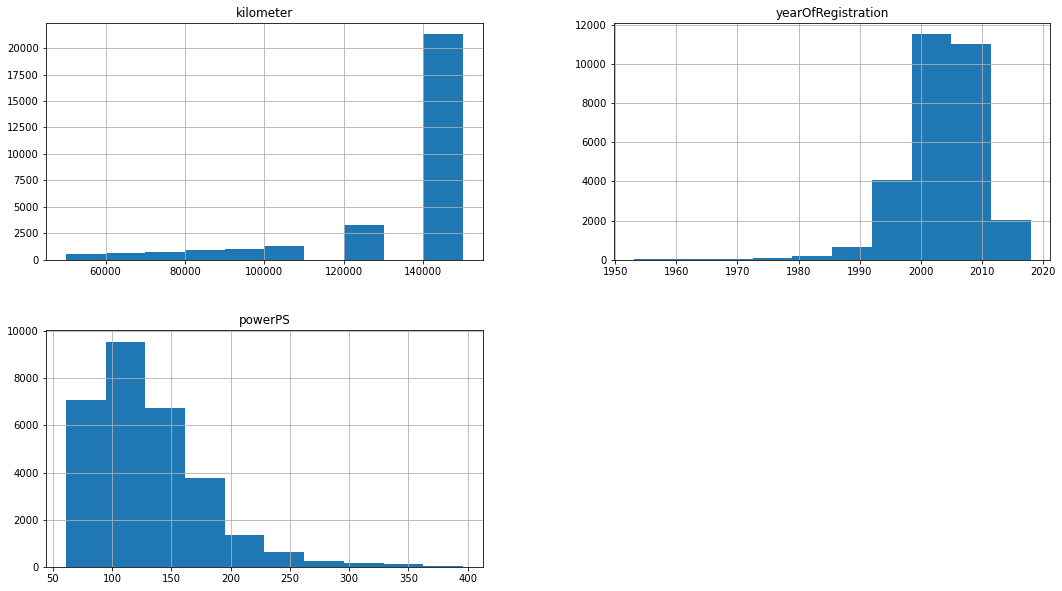

In [25]:
cars_df.hist(figsize=(18,10),column=['kilometer', 'yearOfRegistration', 'powerPS'])

#### Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

<AxesSubplot:xlabel='gearbox', ylabel='price'>

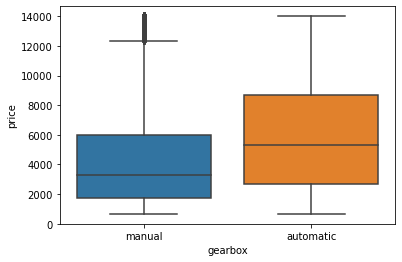

In [26]:
sns.boxplot(data=cars_df, x="gearbox", y="price")

In [27]:
cars_df = cars_df[((cars_df['price'] < 12000) & (cars_df['gearbox'] == 'manual')) | (cars_df['gearbox'] == 'automatic')]
cars_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-04-07 04:44:00
2,2016-04-01 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-04-01 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-04-07 04:44:00
5,2016-04-02 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2016-04-02,26826,2016-04-02 12:51:00
7,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,2016-03-24,13353,2016-03-27 12:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,2016-03-30 17:54:00,Opel_Omega_B_TÜV_02/2017,private,offer,990,control,limousine,1999,manual,136,omega,150000,2,petrol,opel,no,2016-03-30,17214,2016-04-03 08:16:00
49990,2016-03-25 22:47:00,Chervrolet_Orlando_Bilder_Folgen!!!!,private,offer,13500,control,station wagon,2012,automatic,163,others,80000,3,NaN,chevrolet,no,2016-03-25,12555,2016-04-07 06:17:00
49991,2016-03-10 23:36:00,BMW_X3_3.0i,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no,2016-03-10,96152,2016-04-06 02:17:00
49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,2016-03-14,99310,2016-03-31 00:45:00


##### Зачастую машины на автоматической коробке передач стоят дороже не же ли автомобили на механической коробке передач. Из этого можно сделать выводы, что скорее всего выбросы принадлежат люксовым автомобилям на механической коробке передач, чьей целевой аудиторией являются фанаты коробки передач такого типа.

##### Можно сказать, что это не должно сильно повлиять на наш анализ

<AxesSubplot:xlabel='fuelType', ylabel='price'>

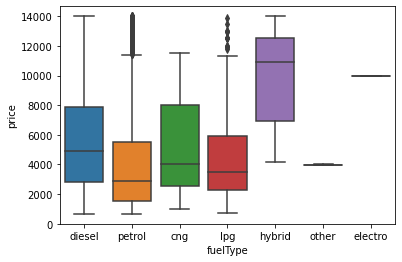

In [28]:
sns.boxplot(data=cars_df, x="fuelType", y="price")

##### На каждом рынке доминируют разные типы топлива, а соответственно и разные классы машин. Именно поэтому считаю не стоит удалять выбросы относящиеся к машинам на ДВС и на газу

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

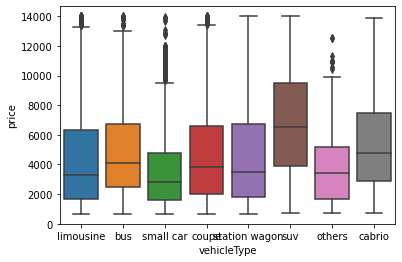

In [29]:
sns.boxplot(data=cars_df, x="vehicleType", y="price")

In [30]:
cars_df = cars_df[((cars_df['price'] < 11000) & (cars_df['vehicleType'] == 'small car')
                   | (cars_df['vehicleType'] == 'limousine') | (cars_df['vehicleType'] == 'suv')
                   | (cars_df['vehicleType'] == 'bus') | (cars_df['vehicleType'] == 'coupe')
                   | (cars_df['vehicleType'] == 'station wagon') | (cars_df['vehicleType'] == 'others')
                   | (cars_df['vehicleType'] == 'others'))]
cars_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-04-07 04:44:00
2,2016-04-01 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-04-01 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-04-07 04:44:00
5,2016-04-02 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2016-04-02,26826,2016-04-02 12:51:00
7,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,2016-03-24,13353,2016-03-27 12:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,2016-03-30 17:54:00,Opel_Omega_B_TÜV_02/2017,private,offer,990,control,limousine,1999,manual,136,omega,150000,2,petrol,opel,no,2016-03-30,17214,2016-04-03 08:16:00
49990,2016-03-25 22:47:00,Chervrolet_Orlando_Bilder_Folgen!!!!,private,offer,13500,control,station wagon,2012,automatic,163,others,80000,3,NaN,chevrolet,no,2016-03-25,12555,2016-04-07 06:17:00
49991,2016-03-10 23:36:00,BMW_X3_3.0i,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no,2016-03-10,96152,2016-04-06 02:17:00
49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,2016-03-14,99310,2016-03-31 00:45:00


##### Маленькие машины в большинстве случаев стоят дешевле так как они являются более доступными. Из этого можно сделать вывод, что выбросы могут принадлежать таким машинам как Mini и Fiat, которые так же могут относиться к категории coupe. 

###### Следовательно частью выбросов small car можно принебречь

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

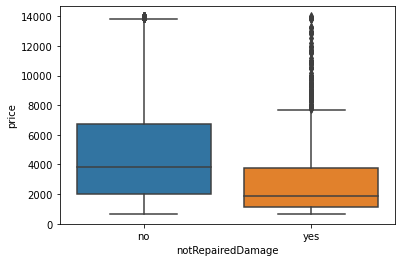

In [31]:
sns.boxplot(data=cars_df, x="notRepairedDamage", y="price")

In [32]:
cars_df = cars_df[((cars_df['price'] < 8000) & (cars_df['notRepairedDamage'] == 'yes')) 
                  | (cars_df['notRepairedDamage'] == 'no')]
cars_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-04-07 04:44:00
5,2016-04-02 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2016-04-02,26826,2016-04-02 12:51:00
7,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,2016-03-24,13353,2016-03-27 12:45:00
8,2016-03-28 14:40:00,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,4680,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,2016-03-28,28307,2016-04-06 18:19:00
9,2016-04-05 11:38:00,Skoda_Octavia_2.0_TDI_DSG_Elegance,private,offer,8340,test,limousine,2005,automatic,140,octavia,125000,4,diesel,skoda,no,2016-04-05,16761,2016-04-05 11:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,2016-03-30 17:54:00,Opel_Omega_B_TÜV_02/2017,private,offer,990,control,limousine,1999,manual,136,omega,150000,2,petrol,opel,no,2016-03-30,17214,2016-04-03 08:16:00
49990,2016-03-25 22:47:00,Chervrolet_Orlando_Bilder_Folgen!!!!,private,offer,13500,control,station wagon,2012,automatic,163,others,80000,3,NaN,chevrolet,no,2016-03-25,12555,2016-04-07 06:17:00
49991,2016-03-10 23:36:00,BMW_X3_3.0i,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no,2016-03-10,96152,2016-04-06 02:17:00
49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,2016-03-14,99310,2016-03-31 00:45:00


#### Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [33]:
missing_values_table(cars_df)

,Missing Values,% of Total Values
model,515,2.4
fuelType,508,2.3


In [34]:
cars_df.model.value_counts()

golf        1847
others      1539
3er         1465
passat       818
a4           747
            ... 
citigo         1
sl             1
roadster       1
cuore          1
m_reihe        1
Name: model, Length: 228, dtype: int64

In [35]:
cars_df.fuelType.value_counts()

petrol     12699
diesel      8007
lpg          460
cng           53
hybrid        16
electro        1
other          1
Name: fuelType, dtype: int64

In [36]:
cars_df.model.fillna("others", inplace = True)
cars_df.fuelType.fillna("petrol", inplace = True)

##### В результате у нас остались пустые значения в двух столбцах и их количество настолько мало, что мы можем их заменить на самые популярные значения во всем фрейме. В первом случае мы заменим пустые значения на others, так как этот вариант является универсальным. Во втором варианте заменим пустые значения на значение petrol.

#### Сохраните полученный датасет и выведете его.

In [37]:
cars_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-04-07 04:44:00
5,2016-04-02 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2016-04-02,26826,2016-04-02 12:51:00
7,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,2016-03-24,13353,2016-03-27 12:45:00
8,2016-03-28 14:40:00,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,4680,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,2016-03-28,28307,2016-04-06 18:19:00
9,2016-04-05 11:38:00,Skoda_Octavia_2.0_TDI_DSG_Elegance,private,offer,8340,test,limousine,2005,automatic,140,octavia,125000,4,diesel,skoda,no,2016-04-05,16761,2016-04-05 11:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,2016-03-30 17:54:00,Opel_Omega_B_TÜV_02/2017,private,offer,990,control,limousine,1999,manual,136,omega,150000,2,petrol,opel,no,2016-03-30,17214,2016-04-03 08:16:00
49990,2016-03-25 22:47:00,Chervrolet_Orlando_Bilder_Folgen!!!!,private,offer,13500,control,station wagon,2012,automatic,163,others,80000,3,petrol,chevrolet,no,2016-03-25,12555,2016-04-07 06:17:00
49991,2016-03-10 23:36:00,BMW_X3_3.0i,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no,2016-03-10,96152,2016-04-06 02:17:00
49992,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,2016-03-14,99310,2016-03-31 00:45:00


In [38]:
cars_df.to_csv("clean_cars_sampled.csv", index=False)

In [39]:
df = pd.read_csv('clean_cars_sampled.csv')
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19 00:00:00,34537,2016-04-07 04:44:00
1,2016-04-02 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2016-04-02 00:00:00,26826,2016-04-02 12:51:00
2,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,2016-03-24 00:00:00,13353,2016-03-27 12:45:00
3,2016-03-28 14:40:00,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,4680,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,2016-03-28 00:00:00,28307,2016-04-06 18:19:00
4,2016-04-05 11:38:00,Skoda_Octavia_2.0_TDI_DSG_Elegance,private,offer,8340,test,limousine,2005,automatic,140,octavia,125000,4,diesel,skoda,no,2016-04-05 00:00:00,16761,2016-04-05 11:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21740,2016-03-30 17:54:00,Opel_Omega_B_TÜV_02/2017,private,offer,990,control,limousine,1999,manual,136,omega,150000,2,petrol,opel,no,2016-03-30 00:00:00,17214,2016-04-03 08:16:00
21741,2016-03-25 22:47:00,Chervrolet_Orlando_Bilder_Folgen!!!!,private,offer,13500,control,station wagon,2012,automatic,163,others,80000,3,petrol,chevrolet,no,2016-03-25 00:00:00,12555,2016-04-07 06:17:00
21742,2016-03-10 23:36:00,BMW_X3_3.0i,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,8,petrol,bmw,no,2016-03-10 00:00:00,96152,2016-04-06 02:17:00
21743,2016-03-14 13:57:00,Opel_Astra_2.0_DI_Elegance,private,offer,790,test,limousine,1998,manual,82,astra,150000,9,diesel,opel,no,2016-03-14 00:00:00,99310,2016-03-31 00:45:00


##### Небольшой блок описательной статистики по "чистому" датасету

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21745 entries, 0 to 21744
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          21745 non-null  object
 1   name                 21745 non-null  object
 2   seller               21745 non-null  object
 3   offerType            21745 non-null  object
 4   price                21745 non-null  int64 
 5   abtest               21745 non-null  object
 6   vehicleType          21745 non-null  object
 7   yearOfRegistration   21745 non-null  int64 
 8   gearbox              21745 non-null  object
 9   powerPS              21745 non-null  int64 
 10  model                21745 non-null  object
 11  kilometer            21745 non-null  int64 
 12  monthOfRegistration  21745 non-null  int64 
 13  fuelType             21745 non-null  object
 14  brand                21745 non-null  object
 15  notRepairedDamage    21745 non-null  object
 16  date

In [41]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,21745.000000,21745.000000,21745.000000,21745.000000,21745.000000,21745.000000
mean,4452.138515,2002.953277,127.876891,135887.100483,6.279145,51598.243182
std,3132.265005,5.173501,47.108995,26716.967453,3.468305,25866.916367
min,666.000000,1953.000000,61.000000,50000.000000,0.000000,1067.000000
25%,1899.000000,2000.000000,95.000000,125000.000000,3.000000,31228.000000
50%,3500.000000,2003.000000,118.000000,150000.000000,6.000000,50933.000000
75%,6450.000000,2007.000000,150.000000,150000.000000,9.000000,72519.000000
max,13999.000000,2018.000000,394.000000,150000.000000,12.000000,99994.000000


In [42]:
missing_values_table(df)

,Missing Values,% of Total Values


In [43]:
df.nunique()

dateCrawled             9667
name                   16110
seller                     1
offerType                  1
price                   1009
abtest                     2
vehicleType                7
yearOfRegistration        55
gearbox                    2
powerPS                  241
model                    228
kilometer                  8
monthOfRegistration       13
fuelType                   7
brand                     39
notRepairedDamage          2
dateCreated               59
postalCode              5811
lastSeen                6996
dtype: int64

In [44]:
df.apply(lambda col: col.unique())

dateCrawled            [2016-03-19 17:50:00, 2016-04-02 12:51:00, 201...
name                   [Seat_Ibiza_1.4_16V_Reference, VW_Passat_35i_F...
seller                                                         [private]
offerType                                                        [offer]
price                  [4500, 988, 1399, 4680, 8340, 1870, 2500, 990,...
abtest                                                   [control, test]
vehicleType            [small car, limousine, coupe, station wagon, s...
yearOfRegistration     [2006, 1995, 1997, 2005, 2001, 2003, 1999, 199...
gearbox                                              [manual, automatic]
powerPS                [86, 90, 136, 122, 140, 82, 105, 68, 83, 101, ...
model                  [ibiza, passat, clk, vectra, octavia, a_klasse...
kilometer              [60000, 150000, 125000, 80000, 90000, 50000, 1...
monthOfRegistration           [12, 2, 11, 4, 1, 9, 5, 3, 10, 8, 7, 0, 6]
fuelType               [petrol, diesel, cng, lpg, h

#### Постройте модель регрессии для цены автомобиля

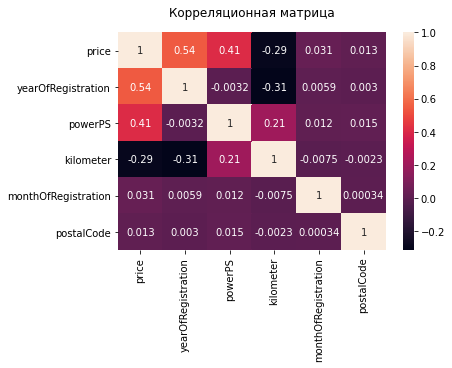

In [45]:
heat_map = sns.heatmap(df.corr(), annot = True)
plt.title("Корреляционная матрица", pad=16)
plt.show()

Можем наблюдать что показатели yearOfRegistration, powerPS, kilometer имеют высокую корреляцию с показателем price. Следовательно мы можем их использовать для нашей модели. 

In [46]:
df_for_model = df[["price", "yearOfRegistration", "powerPS", "kilometer"]]
df_for_model

,price,yearOfRegistration,powerPS,kilometer
0,4500,2006,86,60000
1,988,1995,90,150000
2,1399,1997,136,150000
3,4680,2005,122,150000
4,8340,2005,140,125000
...,...,...,...,...
21740,990,1999,136,150000
21741,13500,2012,163,80000
21742,10900,2004,231,150000
21743,790,1998,82,150000


In [47]:
Y = np.array(df_for_model["price"]).reshape(-1, 1)
X = df_for_model[['yearOfRegistration', 'powerPS', 'kilometer']].to_numpy()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [49]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
print("The R-squared value is: {0:0.4f} \n".format(model.score(X_train, y_train)))

The R-squared value is: 0.5087 



In [51]:
print(f'''Коэффициент корреляции {round(model.score(X_train, y_train), 4)} показывает что корреляция между тренировочными признаками слабо-умеренная''')

Коэффициент корреляции 0.5087 показывает что корреляция между тренировочными признаками слабо-умеренная


In [52]:
predicted = model.predict(X_test)

In [53]:
print("The R-squared value is: {0:0.4f}".format(model.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(np.mean(abs(predicted-y_test)))) 
print("Root Mean Squared Error: {0:0.6f}".format(np.sqrt(np.mean((predicted-y_test)**2)))) 
print("Relative Absolute Error: {0:0.6f}".format(np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test))))) 
print("Relative Squared Error: {0:0.6f}".format(np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)))

The R-squared value is: 0.5330
Mean Absolute Error: 1624.912596
Root Mean Squared Error: 2163.056441
Relative Absolute Error: 0.623300
Relative Squared Error: 0.466978
